In [7]:
pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.9/344.9 kB 1.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.0/653.0 kB 1.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 1.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 1.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 247.5 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 1.6 MB/s eta 0:00:0000:0100:010m
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=48ff2f361e7adf8170412b2bfe2784d5c1b4ade5b2831103def689d07f38551f
  Stored in directory: /Users/mac/Library/Caches/pip/wheels/ab/a0/78/885e94cd7af32ff120febdad1870c5381c884d7f4b332d58dd
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.1.1
    Uninstalling t

In [8]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt

In [51]:
data = pd.read_csv("./diamonds.csv")

In [10]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,330,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,327,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,328,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,337,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,338,4.34,4.35,2.75


In [11]:
profile = ProfileReport(data, 
                        title="Diamond",
                        correlations={'pearson': {'calculate': True}},
                        explorative=True)
correlations = profile.description_set["correlations"]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [22]:
pearson_df=correlations['pearson']

In [21]:
import seaborn as sns

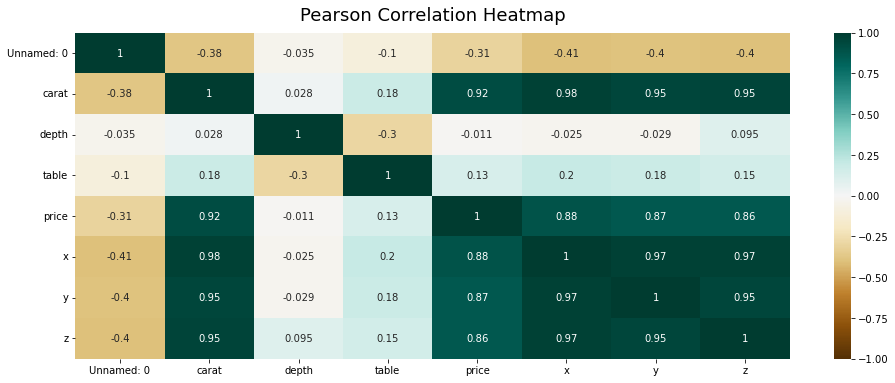

In [24]:
#Q1.1
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(pearson_df, 
                      vmin=-1, 
                      vmax=1, 
                      annot=True, 
                      cmap='BrBG')
heatmap.set_title('Pearson Correlation Heatmap', 
                  fontdict={'fontsize':18}, 
                  pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

0.92 is the highest absolute correlation with "price". It's between price and carat. 

Based on the correlation matrix plot, we can see there's high correlatin carate and x,y,z. So, when we choose feature we should avoid carat and x,y,z at the same time to avoid multicollinearity. 

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

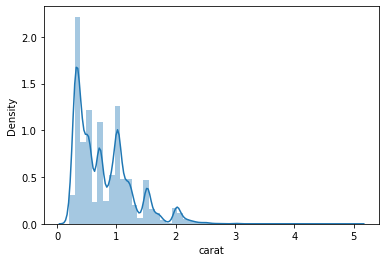

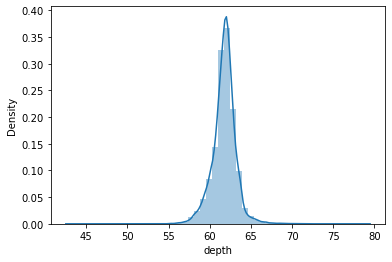

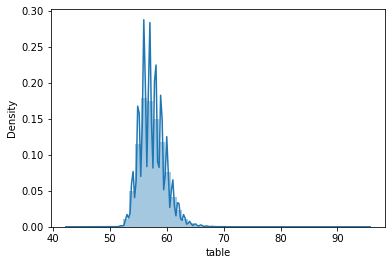

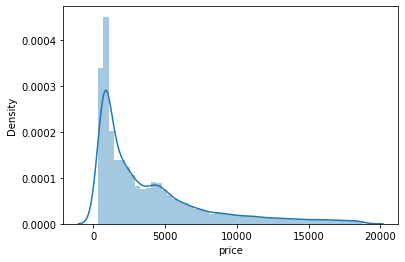

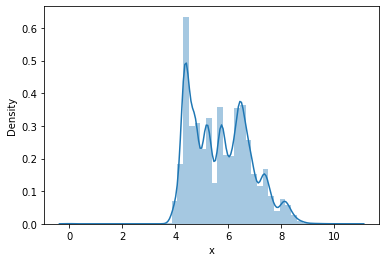

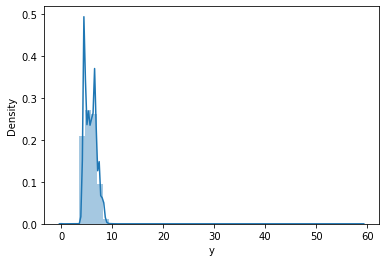

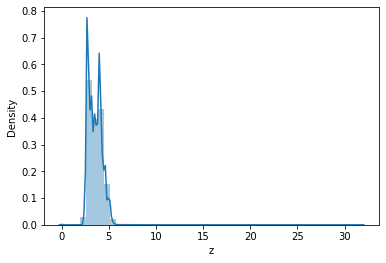

In [45]:
#Q1.2
num = ["carat", "depth","table","price","x","y","z"]
num_data = data[num]
for i, col in enumerate(num_data.columns):
    plt.figure(i)
    sns.distplot(num_data[col])

For high skewed data, we can do transformation like log transform, square-root transform, and box-cox tranform. We also can replace extreme values, trimming data, and standarlization the data. 

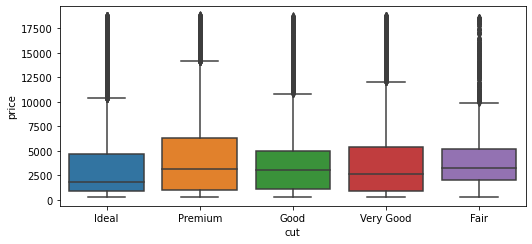

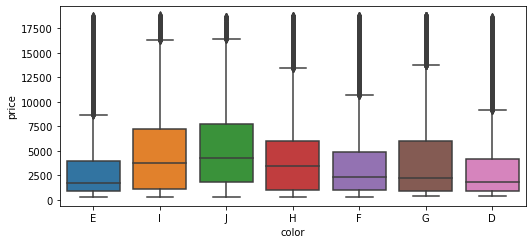

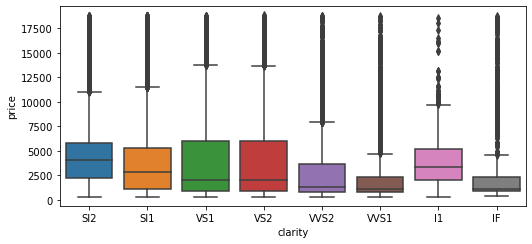

In [60]:
#Q1.3
index = ["cut", "color","clarity","price"]
category = ["cut", "color","clarity"]
cate_data = data[index]

for i, col in enumerate(category):
    plt.figure(i)
    sns.boxplot(data=cate_data, x=cate_data[col], y='price')

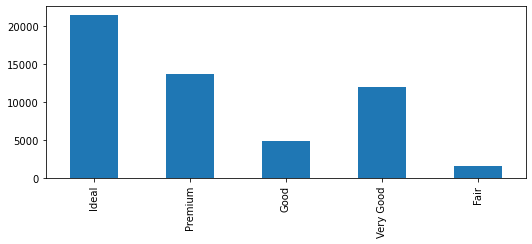

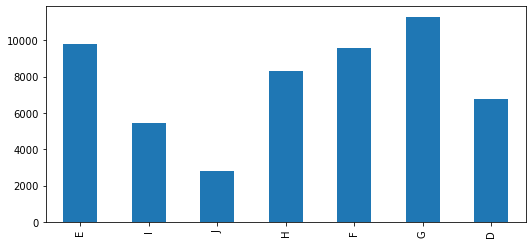

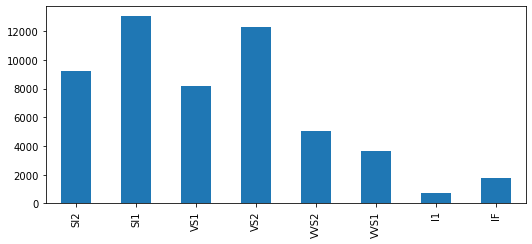

In [64]:
#Q1.4
for i, col in enumerate(category):
    plt.figure(i)
    cate_data[col].value_counts()[cate_data[col].unique()].plot(kind='bar')

In [29]:
cut_map={'Fair':1, 'Good':2,'Very Good':3, 'Premium':4, 'Ideal':5}
color_map={'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1}
clarity_map={'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}
processed_cut=[]
processed_color=[]
processed_clarity=[]
for cut in data['cut']:
    processed_cut.append(cut_map[cut])
for color in data['color']:
    processed_color.append(color_map[color])
for clarity in data['clarity']:
    processed_clarity.append(clarity_map[clarity])
df_cut=pd.DataFrame(processed_cut,columns=['cut'])
df_color=pd.DataFrame(processed_color,columns=['color'])
df_clarity=pd.DataFrame(processed_clarity,columns=['clarity'])

In [30]:
processed_data=pd.concat([data[['carat', 'depth', 'table', 'x', 'y', 'z']],
                          df_cut,
                          df_color,
                          df_clarity], 
                         axis=1)